In [30]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from music21 import *
from generation_functions import *
from analysis_functions import *

In [31]:
#clearing out old files
!rm *.mid
!rm *.pkl
!rm *.mp3

rm: cannot remove '*.mp3': No such file or directory


A (mostly) integrated workflow for generating melodies for the exposure, forced-choice, and slider/interpretation parts of the experiment.

How to use:
Part 1 uses markov grammar to generate a sequence of strings which correspond to pitches ('C4', etc.). There are separate grammars defined for melodies starting on A3 or A4 (to make sure listeners are paying attention). 

Part 2 generates some analyses of the sequences generated and compares this data to what is theoretically expected.

Part 3 converts the string sequences into midi files. Run all cells above part 3 for each type of melody to be generated so that there are different melodies for each part of the experiment.

Part 4 convert midi files to mp3 so that they can be used with jspsych. Currently using colab to convert because the command line function here is for linux...

PART 1: MARKOV SEQUENCE GENERATION

In [32]:
#generating a list of grammatical note sequences
melody_list = markov_melody_lowstart(5, matrix_lowstart)
#print(melody_list)

PART 2: ANALYSES OF SEQUENCES

In [33]:
#informatic analyses on the melody
melody_corpus = cleanup_corpus(melody_list)
 #throws an error if you try to run it a second time on the melody list

#print(melody_corpus)

In [34]:
#informatic analyses on the melody
melody_corpus = cleanup_corpus(melody_list)
 #throws an error if you try to run it a second time on the melody list


IC_nocontext = IC(melody_corpus)
IC_probs = IC_context_prob(melody_corpus)
IC = IC_context(melody_corpus)

#IC_nocontext_frame = pd.DataFrame.from_dict(IC_nocontext, orient= 'index', columns = ['IC no context'])
#IC_probs_frame = pd.DataFrame.from_dict(IC_probs, orient= 'index', columns = ['IC transition probs'])
#IC_frame = pd.DataFrame.from_dict(IC, orient= 'index', columns = ['IC(n|c)'])

#print(IC_nocontext_frame, IC_probs_frame, IC_frame)

Text(0, 0.5, '$-log_2(p(pitch|context))$')

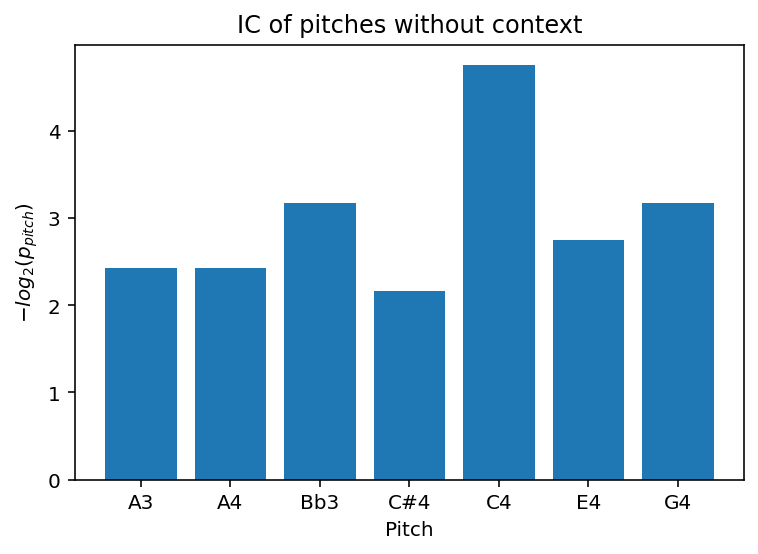

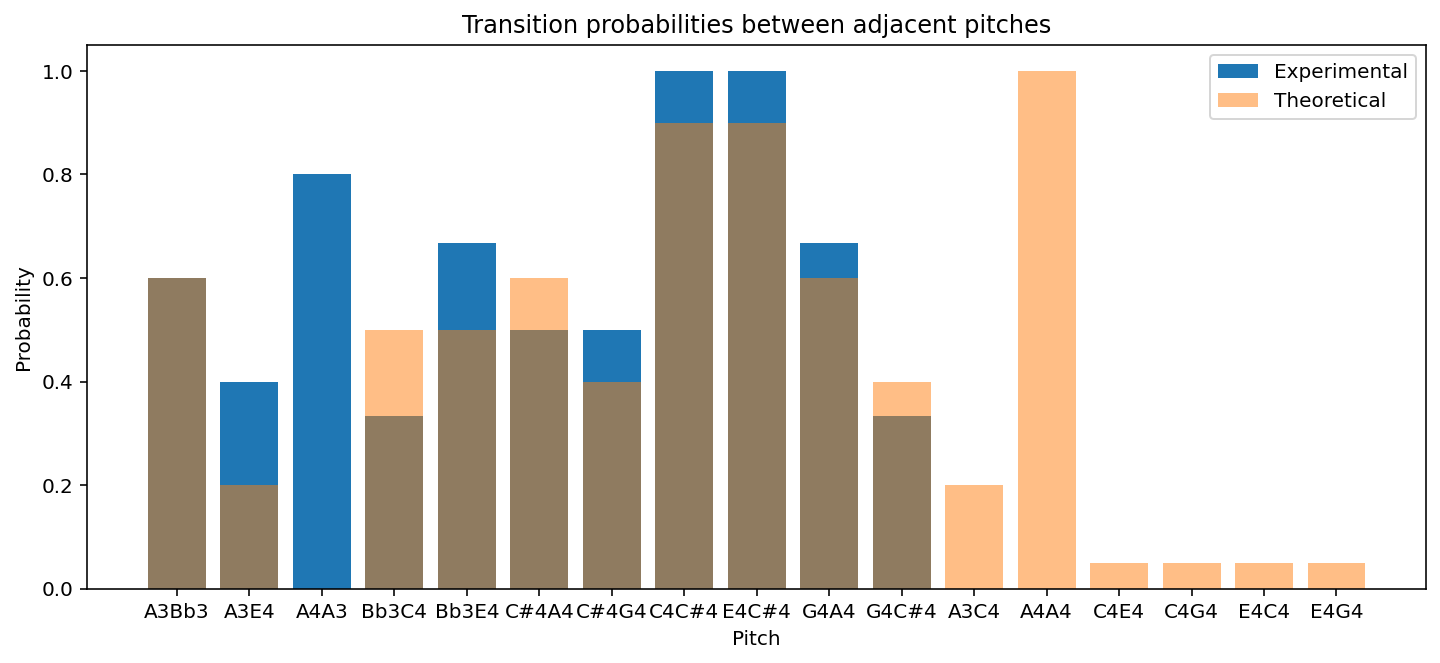

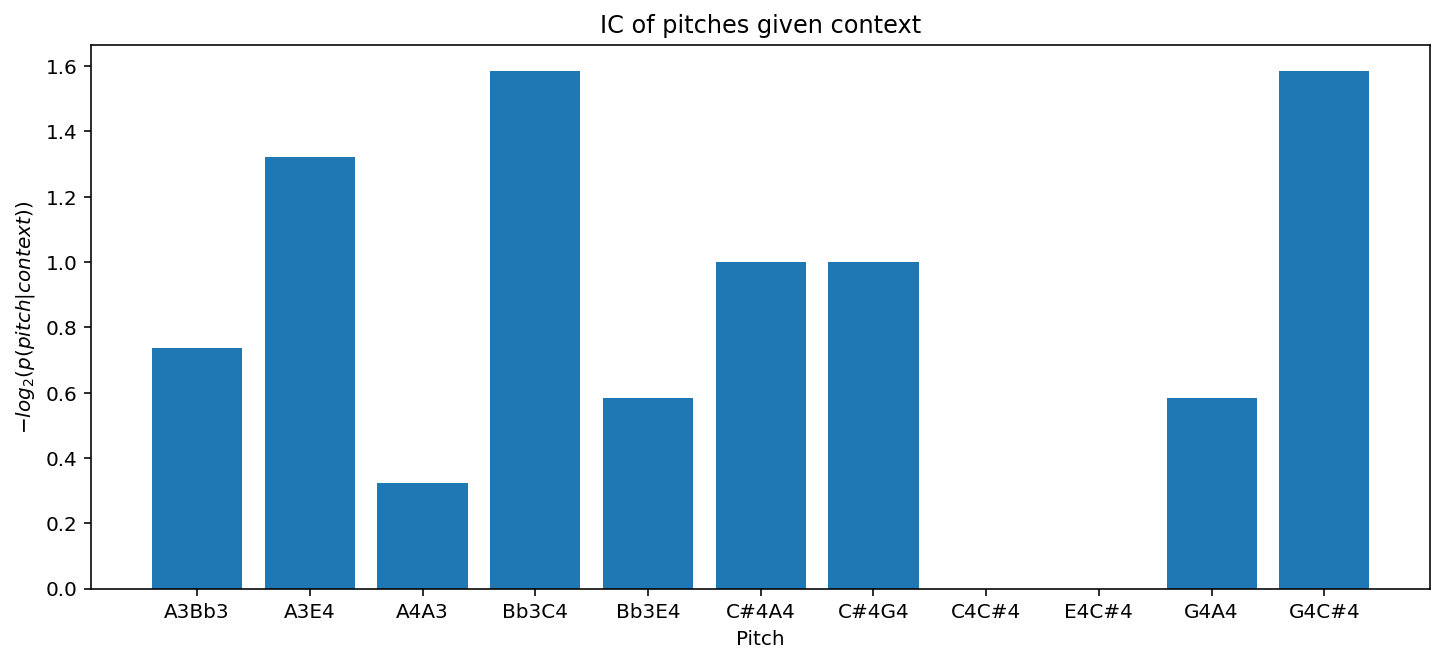

In [35]:
#plotting information analysis
plt.figure()
plt.bar(IC_nocontext.index, IC_nocontext['Probs'])
plt.title('IC of pitches without context')
plt.xlabel('Pitch')
plt.ylabel('$-log_2(p_{pitch})$')

plt.figure(figsize=(12,5))
#make sure the theoretical and experimental plots come from the same matrices!
plt.bar(IC_probs.index, IC_probs['Transition probs'], label = 'Experimental')
plt.bar(ttp_lowstart['Pitches'], ttp_lowstart['Transition probs'], alpha = 0.5, label = 'Theoretical')
plt.title('Transition probabilities between adjacent pitches')
plt.xlabel('Pitch')
plt.ylabel('Probability')
plt.legend()

plt.figure(figsize=(12,5))
plt.bar(IC.index, IC['Transition probs'])
plt.title('IC of pitches given context')
plt.xlabel('Pitch')
plt.ylabel('$-log_2(p(pitch|context))$')

PART 3: CONVERTING TO MIDI

In [36]:
#to_midi_exposure(len(melody_list))

In [37]:
#to_midi_forcedchoice_1(len(melody_list), 'G4', 'C#4')

In [38]:
#to_midi_forcedchoice_2(len(melody_list), 'G4', 'C#4')

In [39]:
to_midi_interpret(len(melody_list), 'G4')

PART 4: CONVERTING TO MP3

In [12]:
#try running on linux

#installing fluidsynth
#!apt install fluidsynth
#!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2

In [13]:
#stringmaker('stream', len(melody_list))